# 가중치 초기화(Weights Initialization)


In [1]:
from tensorflow.keras import models, layers, optimizers

# 모델 생성 함수 

def build_model(activation, initializer):
    model = models.Sequential()
    model.add(layers.Input(shape=(400, 20), name='input'))
    model.add(layers.Dense(20, activation=activation, name='hidden1', 
                        kernel_initializer=initializer))
    model.add(layers.Dense(20, activation=activation, name='hidden2', 
                        kernel_initializer=initializer))
    model.add(layers.Dense(20, activation=activation, name='hidden3', 
                        kernel_initializer=initializer))
    model.add(layers.Dense(20, activation=activation, name='hidden4', 
                        kernel_initializer=initializer))
    model.add(layers.Dense(20, activation=activation, name='hidden5', 
                        kernel_initializer=initializer))
    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
    return model

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def show_layer(model):
    input = np.random.randn(400, 20)

    plt.figure(figsize=(12, 6))
    for i in range(1, 6):
        name = 'hidden' + str(i)
        layer = model.get_layer(name)
        input = layer(input)
        plt.subplot(1, 6, i)
        plt.title(name)
        plt.hist(input, 20, range=(-1, 1))
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

## 선형 함수 가중치 초기화
- activations.sigmoid를 사용하여 초기화 방법들을 비교
- sigmoid함수는 전체적으로 볼 때는 비선형 함수이지만, 특정 범위(-1,1)에서는 선형함수


**제로 초기화**  

iniitializers.Zeros()를 이용해서 가중치를 제로값으로 초기화

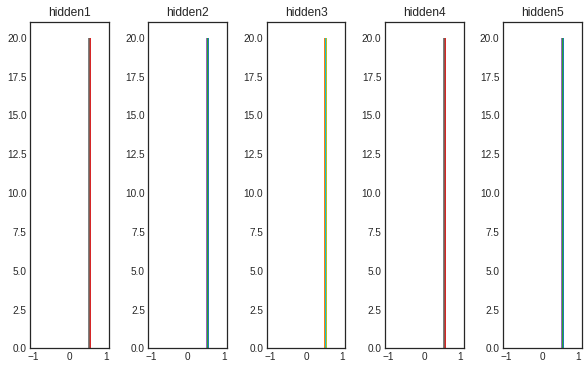

In [3]:
from tensorflow.keras import initializers, activations

model = build_model(activations.sigmoid, initializers.Zeros())
show_layer(model)

**정규분포 초기화**  

initializers.RandomNormal()를 통해 정규분포를 따르도록 무작위 값을 초기화

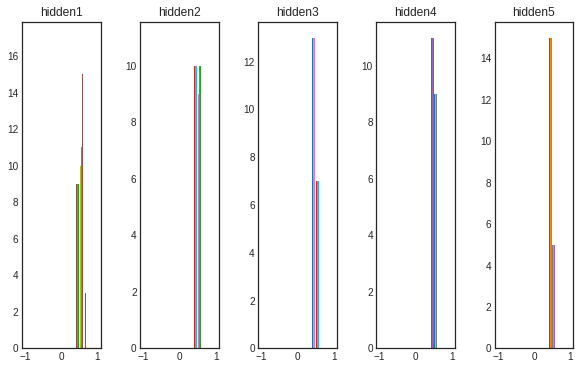

In [4]:
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

정규분포를 따르도록 무작위 값을 초기화하면 제로 초기화보다는 분포가 퍼져있는 것을 알 수 있음  
그러나 한 곳에 치우쳐 있기 때문에 여전히 신경망의 표현을 제한한다는 문제가 있음

**균일분포 초기화**  

initializers.RandomUniform()를 통해 균일분포를 따르는 무작위 값으로 초기화

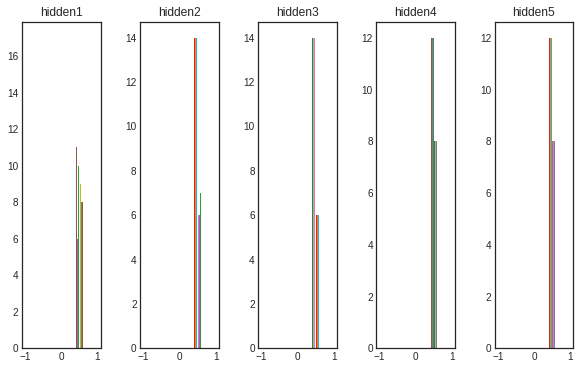

In [5]:
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

균일분포를 따르는 무작위 값으로 초기화한 결과도 제로 초기화보다는 분포가 퍼져있는 것을 알 수 있습니다.   
그러나 활성화 값이 균일하지 않으므로 역전파로 전해지는 기울기 값이 사라질 수 있습니다.

**Xavier(Glorot) 정규분포 초기화**  

Xavier(Glorot) 방법은 은닉층의 노드의 수가 n이라면 표준편차 루트 n분의 1인 분포로 초기화  
initializers.GlorotNormal()를 적용한 모델을 시각화

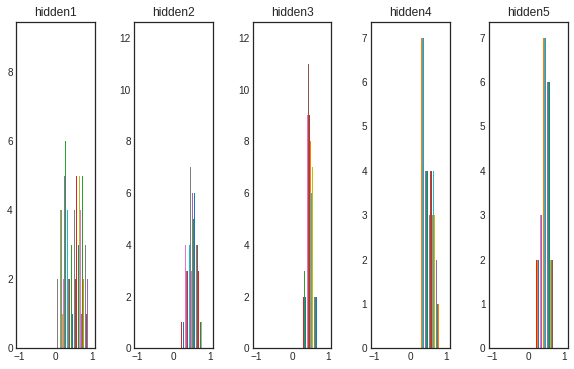

In [6]:
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

initializers.GlorotNormal()를 적용한 모델을 시각화한 결과를 보면 비교적 분포로 고르고 레이어마다 표현이 잘 되고 있는 것을 알 수 있습니다.   
즉, 더 많은 가중치에 역전파가 전달이 가능하게 됩니다.   
일반적으로 Xavier(Glorot) 방법은 활성화 함수가 선형함수인 경우에 매우 적합 합니다.

**Xavier(Glorot) 균일분포 초기화**  
initializers.GlorotUniform()를 통해 Xavier(Glorot) 균일분포 초기화를 이용

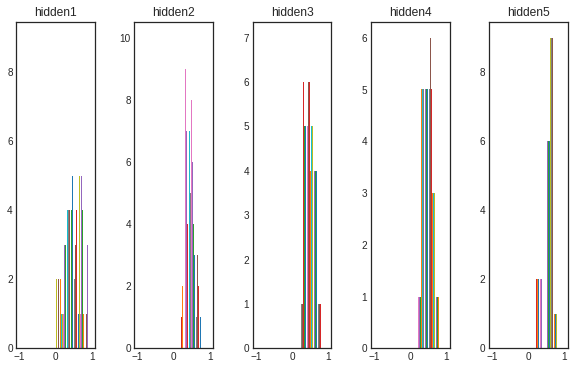

In [7]:
model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)

활성화 함수를 sigmoid 대신 tanh를 적용한 결과, 좀 더 균일한 분포의 모습을 보이는 것을 알 수 있음

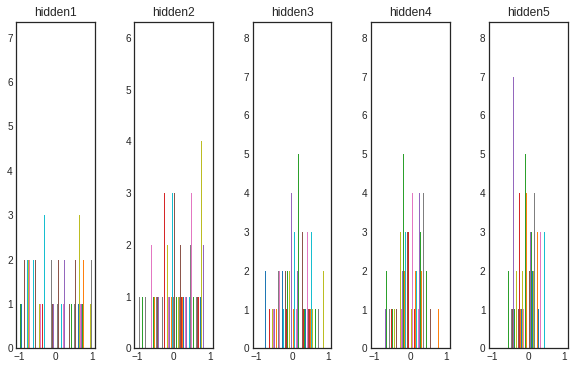

In [8]:
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

**He 정규분포 초기화**  


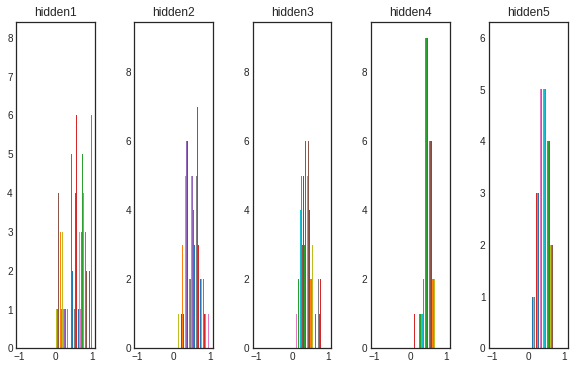

In [9]:
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

**He 균일분포 초기화**  

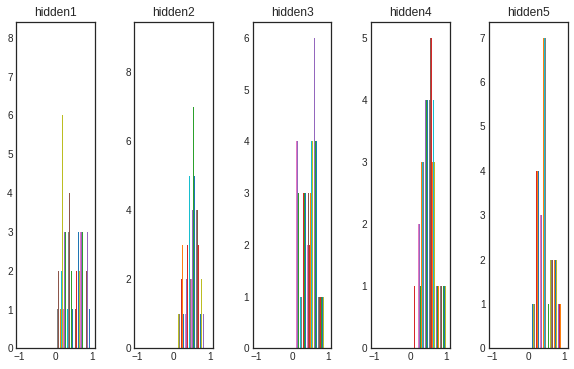

In [10]:
model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

## 비선형 함수 가중치 초기화
- 대표적인 비선형 활성화 함수인 activations.relu를 사용하여 초기화 방법들을 비교

**제로 초기화**
- 가중치를 제로값으로 초기화한 경우, 시각화 결과를 보면 레이어의 가중치 분포가 0에만 몰려 있는 것을 알 수 있음
- 활성화 함수로 relu를 사용하였기 때문에 0인 값은 그대로 0에만 머무는 것을 알 수 있음
- relu(0)=0

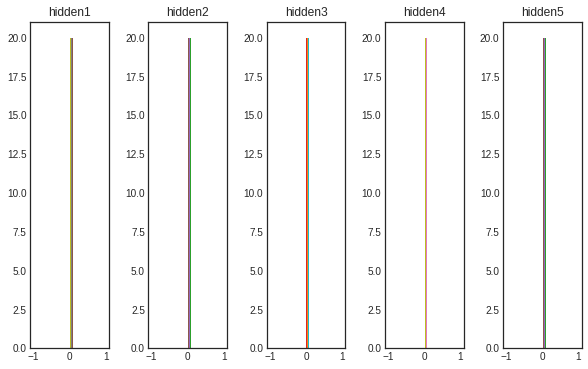

In [11]:
model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

**정규분포 초기화**  
- 제로 초기화보다 나으나, hidden1 레이어를 제외하고는 0에 치우쳐 있는 문제가 있음

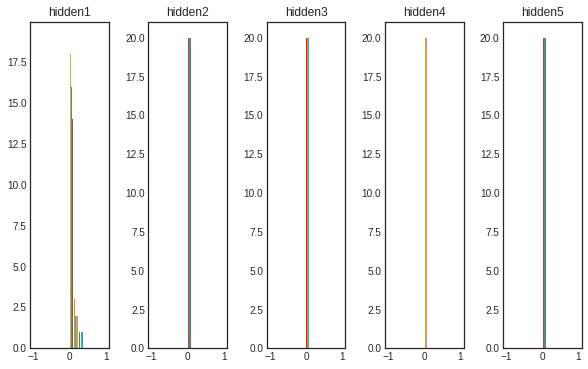

In [12]:
model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)

**균일분포 초기화**
- 균일분포도 마찬가지로 처음 레이어를 제외하고는 가중치 값이 0에 치우쳐 있는 것을 알 수 있음

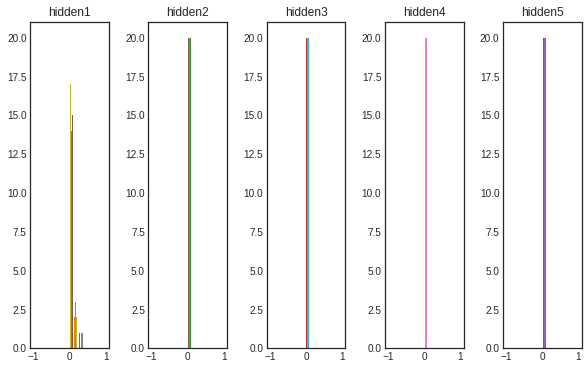

In [13]:
model = build_model(activations.relu, initializers.RandomUniform())
show_layer(model)

**Xavier(Glorot) 정규분포 초기화**  

- Xavier 초기화 방법은 relu 특성상 0인 값이 많지만, 전체 레이어를 보더라도 어느정도 분포가 퍼져있는 것을 알 수 있음

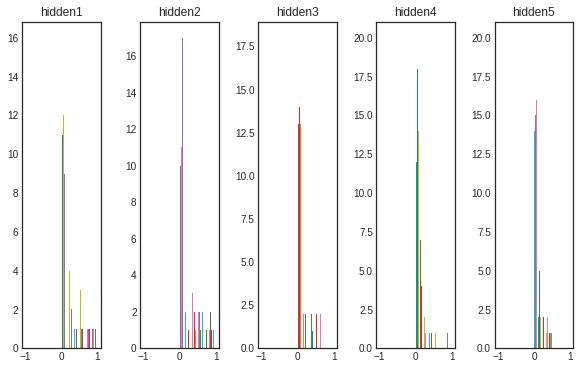

In [14]:
model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)

**Xavier(Glorot) 균일분포 초기화**

- 균일분포도 정규분포와 유사한 형태의 분포를 보여줌

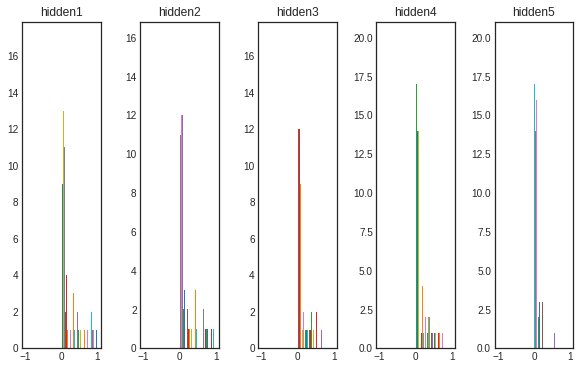

In [15]:
model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)

**He 정규분포 초기화**
- He 초기화는 일반적으로 비선형 함수에 더 적합하다고 알려져있음

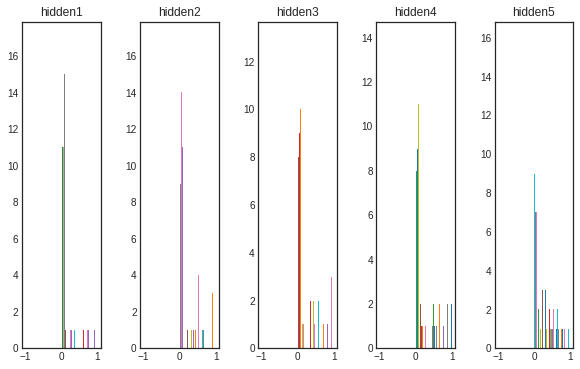

In [16]:
model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

**He 균일분포 초기화**
- 정규분포와 유사한 모습을 보여줌

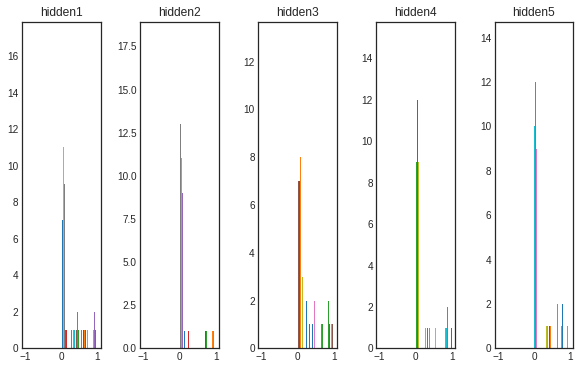

In [17]:
model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

# Reuters 딥러닝 모델 예제

- Reuters 데이터셋은 뉴스 기사를 모아놓은 것으로 주제 분류를 위해 자주 사용하는 데이터
- 뉴스 기사 텍스트와 46개의 토픽으로 구성
- 가중치 초기화 실습 진행

## 데이터 로드 및 전처리
- reuters.load_data() 함수를 통해 다운로드가 가능
- num_words를 10000개로 제한하여 데이터를 로드
- 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분되어 있음
- 레이블을 통해 뉴스 기사의 주제로 46개가 있는 것을 알 수 있음

In [18]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

2121728/2110848 [==============================] - 0s 0us/step
8982
2246
46


- Reuters 데이터셋은 단어 인덱스로만 구성되어 있음
- reuters.get_word_index() 함수를 이용해 인덱스를 단어들로 변환이 가능

In [19]:
word_index = reuters.get_word_index()
word_index

565248/550378 [==============================] - 0s 0us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [20]:
# 인덱스 단어 딕셔너리 형태로 만들기 위해서 단어 인덱스 딕셔너리를 역으로 변환
index_word = dict([(value, key) for (key, value) in word_index.items()])
index_word

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [21]:
# train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들어 줌
news = ' '.join([str(i) for i in train_data[0]])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

- 단어 인덱스에서 0은 패딩을 의미하는 토큰인 pad,   
- 1은 문장의 시작을 의미하는 토큰인 sos,   
- 2는 OOV(Out Of Vocabulary)를 의미하는 토큰인 unk으로 지정되어 있습니다.   
- 그러므로 i-3으로 인덱스를 맞춰주고, 해당 토큰들은 ?로 대체합니다.

In [22]:
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

- 딥러닝 모델의 학습에 사용하기 위해서는 텍스트 데이터를 벡터로 변환
- 원핫인코딩을 이용하여 0과 1로 변환

In [23]:
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


Reuters 데이터셋에서 레이블은 46개의 주제를 구분하기 위한 인덱스로 되어 있습니다. 몇 개의 레이블을 확인해 봅시다.

In [24]:
print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


뉴스 주제인 레이블도 원-핫 인코딩(범주형 인코딩)을 이용해 변환을 수행해 주어야 합니다. 케라스에서는 utils.to_categorical()을 이용해 쉽게 변환할 수 있습니다.

In [25]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 모델 구성

In [27]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

## 모델 컴파일 및 학습

In [28]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 46)                5934      
Total params: 1,302,574
Trainable params: 1,302,574
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 35ms/step - loss: 2.0820 - accuracy: 0.5779 - val_loss: 1.3663 - val_accuracy: 0.6995
Epoch 2/40
18/18 [==============================] - 0s 14ms/step - loss: 1.0429 - accuracy: 0.7761 - val_loss: 1.1127 - val_accuracy: 0.7591
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.7235 - accuracy: 0.8488 - val_loss: 0.9806 - val_accuracy: 0.7863
Epoch 4/40
18/18 [==============================] - 0s 14ms/step - loss: 0.5139 - accuracy: 0.8949 - val_loss: 0.9086 - val_accuracy: 0.8032
Epoch 5/40
18/18 [==============================] - 0s 14ms/step - loss: 0.3868 - accuracy: 0.9182 - val_loss: 0.9424 - val_accuracy: 0.7921
Epoch 6/40
18/18 [==============================] - 0s 14ms/step - loss: 0.2893 - accuracy: 0.9359 - val_loss: 0.9342 - val_accuracy: 0.7956
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2397 - accuracy: 0.9439 - val_loss: 0.9183 - val_accuracy: 0.8063
Epoch 8/40
18

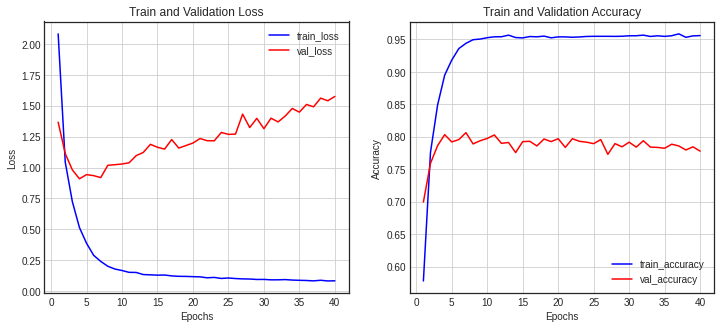

In [30]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

에폭이 진행될수록 val_loss는 계속 증가하고, val_accuracy는 조금씩 감소  
모델은 과대적합된 상태

## 가중치 초기화

In [26]:
def build_model(initializer):
    model = models.Sequential()
    model.add(layers.Dense(128,
                         activation='relu', 
                         kernel_initializer=initializer,
                         input_shape=(10000, ), 
                         name='input'))
    model.add(layers.Dense(128, 
                         activation='relu', 
                         kernel_initializer=initializer,
                         name='hidden'))
    model.add(layers.Dense(46, 
                         activation='softmax', 
                         name='output'))
    model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
    return history

In [31]:
# 모델의 학습 히스토리 결과를 비교해보기 위해서 시각화
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs = range(1, len(h1_loss) + 1)
    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

In [32]:
# 제로 초기화
zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 [==============================] - 1s 33ms/step - loss: 3.8103 - accuracy: 0.1330 - val_loss: 3.7956 - val_accuracy: 0.2110
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 3.7842 - accuracy: 0.1900 - val_loss: 3.7726 - val_accuracy: 0.3620
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 3.7614 - accuracy: 0.3415 - val_loss: 3.7505 - val_accuracy: 0.3620
Epoch 4/40
18/18 [==============================] - 0s 14ms/step - loss: 3.7391 - accuracy: 0.2909 - val_loss: 3.7286 - val_accuracy: 0.3620
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 3.7170 - accuracy: 0.3517 - val_loss: 3.7070 - val_accuracy: 0.3620
Epoch 6/40
18/18 [==============================] - 0s 14ms/step - loss: 3.6952 - accuracy: 0.3162 - val_loss: 3.6856 - val_accuracy: 0.3620
Epoch 7/40
18/18 [==============================] - 0s 12ms/step - loss: 3.6734 - accuracy: 0.3517 - val_loss: 3.6643 - val_accuracy: 0.3620
Epoch 8/40
18

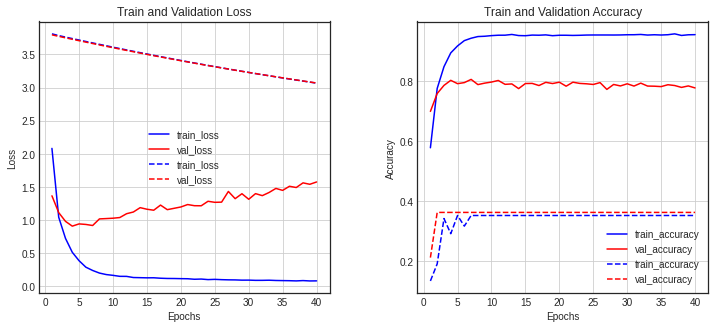

In [33]:
# 기본모델과 제로 초기화 모델과 비교
diff_history(history, zero_history)

Epoch 1/40
18/18 [==============================] - 1s 31ms/step - loss: 2.3176 - accuracy: 0.5191 - val_loss: 1.5775 - val_accuracy: 0.6282
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 1.2695 - accuracy: 0.7065 - val_loss: 1.2904 - val_accuracy: 0.7021
Epoch 3/40
18/18 [==============================] - 0s 14ms/step - loss: 0.9638 - accuracy: 0.7787 - val_loss: 1.1490 - val_accuracy: 0.7346
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 0.7382 - accuracy: 0.8375 - val_loss: 1.0498 - val_accuracy: 0.7596
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 0.5806 - accuracy: 0.8703 - val_loss: 1.0108 - val_accuracy: 0.7734
Epoch 6/40
18/18 [==============================] - 0s 14ms/step - loss: 0.4429 - accuracy: 0.9027 - val_loss: 1.0182 - val_accuracy: 0.7729
Epoch 7/40
18/18 [==============================] - 0s 12ms/step - loss: 0.3521 - accuracy: 0.9194 - val_loss: 1.1105 - val_accuracy: 0.7467
Epoch 8/40
18

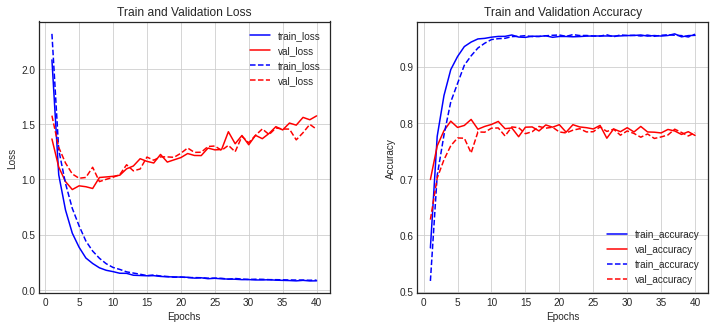

In [34]:
# 정규분포 초기화와 비교
normal_history = build_model(initializers.RandomNormal())
diff_history(history, normal_history)

Epoch 1/40
18/18 [==============================] - 1s 31ms/step - loss: 2.0530 - accuracy: 0.5799 - val_loss: 1.3477 - val_accuracy: 0.6999
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 1.0389 - accuracy: 0.7740 - val_loss: 1.0984 - val_accuracy: 0.7551
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.7197 - accuracy: 0.8455 - val_loss: 0.9992 - val_accuracy: 0.7747
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 0.5141 - accuracy: 0.8906 - val_loss: 0.9620 - val_accuracy: 0.7796
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3842 - accuracy: 0.9185 - val_loss: 0.9379 - val_accuracy: 0.7943
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2901 - accuracy: 0.9349 - val_loss: 0.8961 - val_accuracy: 0.8019
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2381 - accuracy: 0.9419 - val_loss: 0.9500 - val_accuracy: 0.8014
Epoch 8/40
18

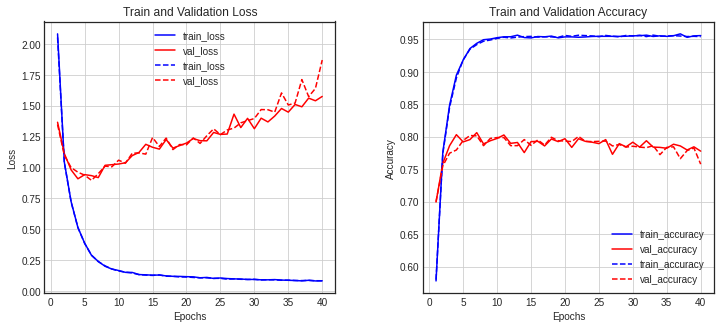

In [35]:
# Xavier(Glorot) 초기화와 비교
# Xavier 초기화 방법은 기존 모델에서 사용하는 균일분포와 매우 유사한 형태로 학습된 것을 알 수 있음
glorot_history = build_model(initializers.GlorotNormal())
diff_history(history, glorot_history)

Epoch 1/40
18/18 [==============================] - 1s 31ms/step - loss: 2.0410 - accuracy: 0.5646 - val_loss: 1.3351 - val_accuracy: 0.7012
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 1.0036 - accuracy: 0.7845 - val_loss: 1.0561 - val_accuracy: 0.7707
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.6569 - accuracy: 0.8599 - val_loss: 0.9693 - val_accuracy: 0.7827
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 0.4569 - accuracy: 0.9069 - val_loss: 0.9059 - val_accuracy: 0.7925
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3339 - accuracy: 0.9290 - val_loss: 0.9496 - val_accuracy: 0.7854
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2577 - accuracy: 0.9429 - val_loss: 0.9414 - val_accuracy: 0.7916
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2166 - accuracy: 0.9459 - val_loss: 0.9195 - val_accuracy: 0.8010
Epoch 8/40
18

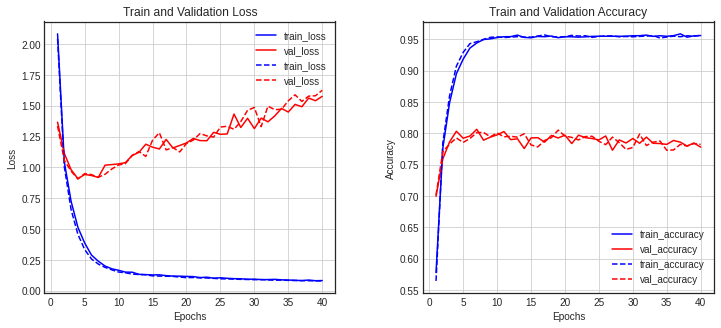

In [36]:
# He 초기화와 비교
# 현재 모델이 비선형 함수인 relu를 사용하여 He 초기화에 더 적합한 것을 알 수 있음
he_history = build_model(initializers.HeNormal())
diff_history(history, he_history)

# 배치 정규화(Batch Normalization)
- 모델에 입력되는 샘플들을 균일하게 만드는 방법 : 가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용시키는 것
- 보통 미니배치 단위로 데이터의 평균이 0, 표준편차는 1로 정규화를 수행하여 학습 자체가 빨리 진행될 수 있도록 만들어 줌
- 학습 후에도 새로운 데이터에 일반화가 잘 될 수 있도록 도와줌
- 주로 Dense 레이어 이후, 활성화 함수 이전에 활용

## 모델 구성 및 컴파일

In [37]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 46)              

In [38]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 2s 33ms/step - loss: 1.8019 - accuracy: 0.6535 - val_loss: 3.3085 - val_accuracy: 0.7458
Epoch 2/40
18/18 [==============================] - 0s 14ms/step - loss: 0.6625 - accuracy: 0.8809 - val_loss: 3.0480 - val_accuracy: 0.7569
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3629 - accuracy: 0.9330 - val_loss: 2.7065 - val_accuracy: 0.7142
Epoch 4/40
18/18 [==============================] - 0s 14ms/step - loss: 0.2390 - accuracy: 0.9475 - val_loss: 2.3131 - val_accuracy: 0.6915
Epoch 5/40
18/18 [==============================] - 0s 14ms/step - loss: 0.1837 - accuracy: 0.9508 - val_loss: 2.0223 - val_accuracy: 0.6696
Epoch 6/40
18/18 [==============================] - 0s 14ms/step - loss: 0.1546 - accuracy: 0.9507 - val_loss: 1.6774 - val_accuracy: 0.7084
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.1355 - accuracy: 0.9529 - val_loss: 1.4922 - val_accuracy: 0.6834
Epoch 8/40
18

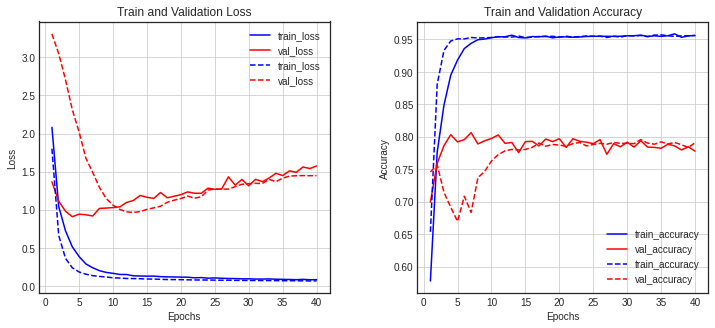

In [39]:
diff_history(history, batch_norm_history)